In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading the csv input data files
cust= pd.read_csv("D:/Pyhton/Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
spend=pd.read_csv("D:/Pyhton/Pandas Case Study 2 - Credit Card Case Study/spend.csv")
repay=pd.read_csv("D:/Pyhton/Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")

In [53]:
cust.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [54]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [55]:
repay.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


1. In the above dataset, 
    a. In case age is less than 18, replace it with mean of age values. 
    
    b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
     (customer’s limit provided in acquisition table is the per transaction limit on his card) 
     
    c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [3]:
#update age if less than 18
cust.loc[(cust.Age < 18),'Age'] = round(cust.Age.mean())

In [4]:
#merge customer info with spend to compare against customer's limit
spend = pd.merge(left=spend,right=cust[['Customer','Limit','City','Age','Product']],on='Customer')

In [5]:
#ovverride with 50% of limit if spend amount is > limit 
spend['Amount'] = np.where(spend['Amount'] > spend['Limit'], spend['Limit'] * 0.5, spend['Amount'])

In [6]:
#merge customer info with repay to compare against customer's limit
repay = pd.merge(left=repay,right=cust[['Customer','Limit','City','Product']],on='Customer')

In [7]:
#ovverride with limit if repay amount is > limit 
repay['Amount'] = np.where(repay['Amount'] > repay['Limit'], repay['Limit'] , repay['Amount'])

2. From the above dataset create the following summaries:  
    a. How many distinct customers exist?  
    b. How many distinct categories exist?  
    c. What is the average monthly spend by customers?  
    d. What is the average monthly repayment by customers?  
    e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
    (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend.
     Interest is earned only on positive profits and not on negative amounts)
     
    f. What are the top 5 product types?  
    g. Which city is having maximum spend?  
    h. Which age group is spending more money? 
    
    i. Who are the top 10 customers in terms of repayment?

In [8]:
#a. How many distinct customers exist?
cust.Customer.nunique()

100

In [9]:
#b. How many distinct categories exist?(or Segment)
cust.Segment.nunique()

5

In [10]:
#c. What is the average monthly spend by customers? : considering all spend for a month irrespective of day
spend['MonthYear'] = spend.Month.apply(lambda x : pd.Timestamp.strptime(x,'%d-%b-%y') + pd.DateOffset(day=1))
#agrregating all trx amount for a month/year for each customer
monthly_spend=spend.groupby(['Customer','MonthYear'], as_index=False).Amount.sum()
#find totalspend by each cutomer and number of distinct months
avg_spend=monthly_spend.groupby('Customer',as_index = False).agg({'Amount' : 'sum', 'MonthYear': 'count'})
#rename columns
avg_spend.columns = ['Customer','TotalAmt','CountMonths']
#divide total amount by number of months for each cutomer to get the monthly average of spend
avg_spend['AvgSpend'] = avg_spend.TotalAmt/avg_spend.CountMonths
avg_spend.head(5)

,Customer,TotalAmt,CountMonths,AvgSpend
0,A1,5142702.76,9,571411.417778
1,A10,3847424.65,11,349765.877273
2,A100,50000.00,1,50000.000000
3,A11,4517227.69,12,376435.640833
4,A12,8183050.64,14,584503.617143


In [11]:
#d. What is the average monthly repayment by customers? : considering all repay trx for a month irrespective of day
repay['MonthYear'] = repay.Month.apply(lambda x : pd.Timestamp.strptime(x,'%d-%b-%y') + pd.DateOffset(day=1))
#agrregating all repay trx amount for a month/year for each customer
monthly_repay=repay.groupby(['Customer','MonthYear'], as_index=False).Amount.sum()
#find total repay by each cutomer and number of distinct months
avg_repay=monthly_repay.groupby('Customer',as_index = False).agg({'Amount' : 'sum', 'MonthYear': 'count'})
#remane columns
avg_repay.columns = ['Customer','TotalAmt','CountMonths']
#divide total repay amount by number of months for each cutomer to get the average repayment by each customer
avg_repay['AvgRepay'] = avg_repay.TotalAmt/avg_repay.CountMonths
avg_repay.head(5)

,Customer,TotalAmt,CountMonths,AvgRepay
0,A1,4753691.67,9,528187.963333
1,A10,3695647.52,10,369564.752000
2,A100,69551.19,1,69551.190000
3,A11,5310934.03,8,663866.753750
4,A12,8334760.16,15,555650.677333


In [12]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 
#Interest is earned only on positive profits and not on negative amounts)

#finding total monthly spend
total_monthly_spend = monthly_spend.groupby('MonthYear', as_index=False).Amount.sum()
#renaming columns in spend
total_monthly_spend.columns=['MonthYear','SpendAmt']
#finding total mothly repayment
total_monthly_repay = monthly_repay.groupby('MonthYear', as_index=False).Amount.sum()
#renaming columns in repay
total_monthly_repay.columns=['MonthYear','RepayAmt']
#merging the data set to find the difference in spend and repayment in each month
monthly_profit = pd.merge(left=total_monthly_spend,right=total_monthly_repay,on='MonthYear')
# Monthly Profit = Monthly repayment – Monthly spend
monthly_profit['MonthlyProfit'] = monthly_profit.RepayAmt - monthly_profit.SpendAmt
# monthly rate of interest is 2.9%, 
monthly_profit['Profit'] = np.where(monthly_profit.MonthlyProfit <= 0, 0, monthly_profit.MonthlyProfit * 0.029)
monthly_profit.sort_values(by = 'MonthYear', ascending = False).head(5)

,MonthYear,SpendAmt,RepayAmt,MonthlyProfit,Profit
29,2006-12-01,2101811.05,2413907.27,312096.22,9050.79038
28,2006-11-01,4039950.52,3930259.60,-109690.92,0.00000
27,2006-10-01,2410188.02,2447635.07,37447.05,1085.96445
26,2006-09-01,1993489.03,2388294.79,394805.76,11449.36704
25,2006-08-01,2994094.85,1938641.97,-1055452.88,0.00000


In [13]:
#f. top 5 product types, based on spend amount
spend.groupby('Type').Amount.sum().sort_values(ascending = False).head(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

In [14]:
#g. city having maximum spend
spend.groupby('City').Amount.sum().sort_values(ascending = False).head(1)
   

City
COCHIN    45963513.5
Name: Amount, dtype: float64

In [15]:
# h. age group is spending more money
spend.groupby('Age').Amount.sum().sort_values(ascending = False).head(1)

Age
46    20240746.17
Name: Amount, dtype: float64

In [16]:
#i. top 10 customers in terms of repayment: who pays back more than spend
monthly_cust_profit = pd.merge(left=avg_repay[['AvgRepay','Customer']],right=avg_spend[['AvgSpend','Customer']],on='Customer')
monthly_cust_profit.loc[:,'difference'] = monthly_cust_profit.AvgRepay - monthly_cust_profit.AvgSpend
monthly_cust_profit.sort_values(by = 'difference', ascending = False).head(10)

,AvgRepay,Customer,AvgSpend,difference
88,497237.970000,A89,24972.020000,472265.950000
7,694426.603750,A15,352044.000000,342382.603750
3,663866.753750,A11,376435.640833,287431.112917
74,265619.050000,A76,30066.440000,235552.610000
37,692314.623636,A42,474415.049333,217899.574303
62,349794.970000,A65,137798.115000,211996.855000
58,658696.431875,A61,473806.652105,184889.779770
22,592533.741818,A29,430440.481429,162093.260390
91,247781.000000,A91,89951.840000,157829.160000
39,595748.470769,A44,442095.660714,153652.810055


In [17]:
spend.loc[:,'Year'] = spend.MonthYear.apply(lambda x : x.year)
spend.groupby(['City','Product','Year']).Amount.sum().head(10)

City       Product   Year
BANGALORE  Gold      2004     9289878.54
                     2005    12892362.99
                     2006    12030611.09
           Platimum  2004     1112732.30
                     2005      912284.97
                     2006      685831.27
           Silver    2004     1291852.58
                     2005      830612.34
                     2006     1415480.94
BOMBAY     Gold      2004     6987853.53
Name: Amount, dtype: float64

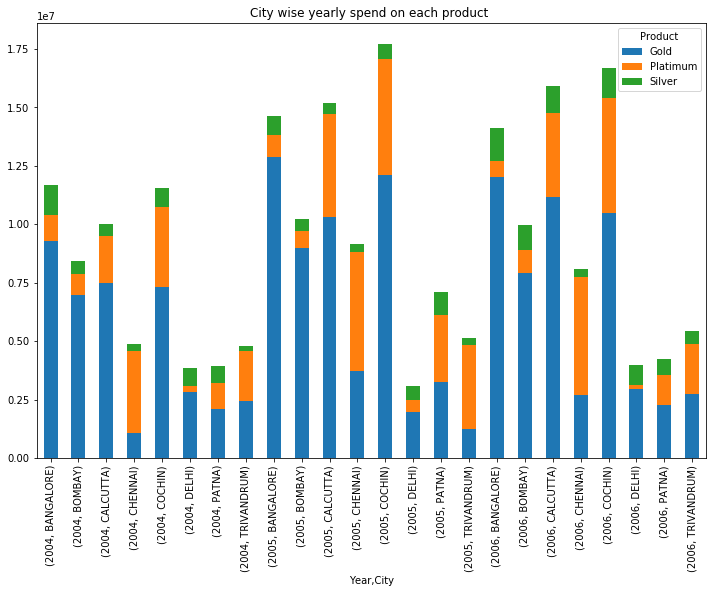

In [18]:
#City wise yearly spend on each product - graphical representation
spend_yearly = spend.groupby(['Year','City','Product'])['Amount'].sum().unstack()
spend_yearly.plot(kind='bar',stacked=True,figsize=[12,8],title = 'City wise yearly spend on each product ')

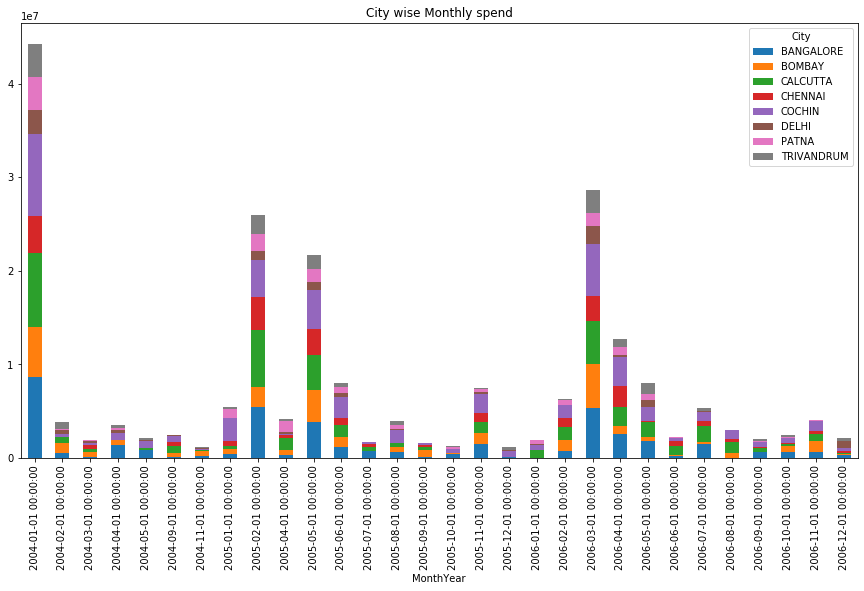

In [19]:
# a. Monthly comparison of total spends, city wise 
spend_monthly = spend.groupby(['MonthYear','City'])['Amount'].sum().unstack()
spend_monthly.plot(kind='bar',stacked=True,figsize=[15,8],title = 'City wise Monthly spend')
plt.show()

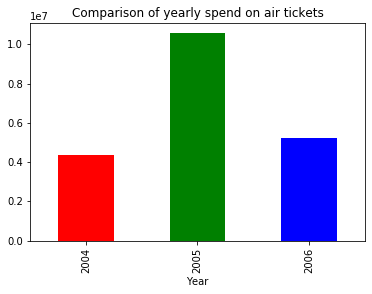

In [20]:
#b. Comparison of yearly spend on air tickets  
spend[spend.Type == 'AIR TICKET'].groupby('Year')['Amount'].sum().plot(kind='bar',color=['r','g','b'],title='Comparison of yearly spend on air tickets')

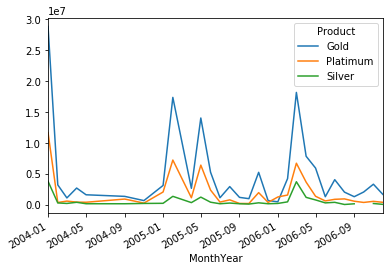

In [81]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
spend_monthly = spend.groupby(['MonthYear','Product'])['Amount'].sum().unstack()
spend_monthly.plot.line()

#there seems to be no seasonality as there are no regular repeating patterns within months or years for any product type

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

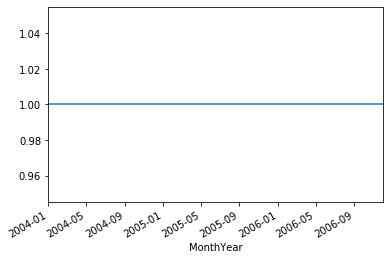

In [88]:
decomposition = seasonal_decompose(spend_monthly.Platimum, model='multiplicative', freq=1)
decomposition.seasonal.plot()
#no seasonality in Platimum

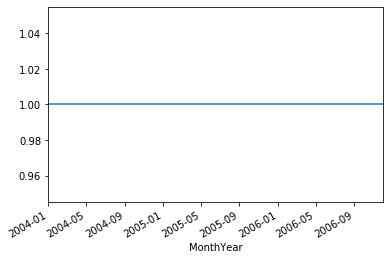

In [91]:
decomposition = seasonal_decompose(spend_monthly.Gold, model='multiplicative', freq=1)
decomposition.seasonal.plot()
#no seasonality in Gold

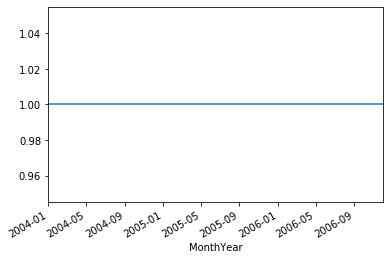

In [95]:
decomposition = seasonal_decompose(spend_monthly.Silver.dropna(), model='multiplicative', freq=1)
decomposition.seasonal.plot()
#no seasonality in Silver

In [49]:
repay.loc[:,'Year'] = repay.MonthYear.apply(lambda x : x.year)

In [50]:
repay.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4,Limit,City,Product,MonthYear,Year
0,NaN,A1,12-Jan-04,495414.75,NaN,500000.0,BANGALORE,Gold,2004-01-01,2004
1,2.0,A1,3-Jan-04,245899.02,NaN,500000.0,BANGALORE,Gold,2004-01-01,2004
2,3.0,A1,15-Jan-04,259490.06,NaN,500000.0,BANGALORE,Gold,2004-01-01,2004
3,4.0,A1,25-Jan-04,437555.12,NaN,500000.0,BANGALORE,Gold,2004-01-01,2004
4,5.0,A1,17-Jan-05,165972.88,NaN,500000.0,BANGALORE,Gold,2005-01-01,2005


In [60]:
def top10CustomersCityProduct(inProduct,inTimePeriod):
    result_df =pd.DataFrame()
    if inTimePeriod == 'monthly' :
        #monthly aggregation of customers repay for each city and the given product
        df=repay[(repay.Product == inProduct)].groupby(['Customer','City','Product','MonthYear'],as_index=False)['Amount'].sum() 
    else : #yearly aggregation of customers repay for each city and the given product
        df=repay[(repay.Product == inProduct)].groupby(['Customer','City','Product','Year'],as_index=False)['Amount'].sum() 
    #picking top 10 customers from each city
    for city in df.City.unique():
        tmp=df[(df.City == city)].sort_values(by = 'Amount', ascending = False).head(10)
        result_df = pd.concat([result_df,tmp])
    return result_df

In [61]:
CustomersCityProduct = top10CustomersCityProduct('Gold','monthly')

In [62]:
CustomersCityProduct

,Customer,City,Product,MonthYear,Amount
0,A1,BANGALORE,Gold,2004-01-01,2241833.41
202,A43,BANGALORE,Gold,2005-05-01,1965809.72
198,A43,BANGALORE,Gold,2004-01-01,1906497.47
42,A13,BANGALORE,Gold,2004-01-01,1627668.57
164,A30,BANGALORE,Gold,2005-05-01,1601544.66
62,A14,BANGALORE,Gold,2005-02-01,1476119.12
205,A43,BANGALORE,Gold,2006-03-01,1378774.72
46,A13,BANGALORE,Gold,2005-02-01,1298230.61
67,A14,BANGALORE,Gold,2006-03-01,1257854.52
52,A13,BANGALORE,Gold,2006-03-01,1183569.05
